In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [231]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [232]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [233]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [234]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [235]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [236]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [237]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [238]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [239]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [240]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [241]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [242]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [243]:
type(X)

pandas.core.frame.DataFrame

In [244]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [245]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [246]:
X_train.shape,X_test.shape

type(X_train)

X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [247]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


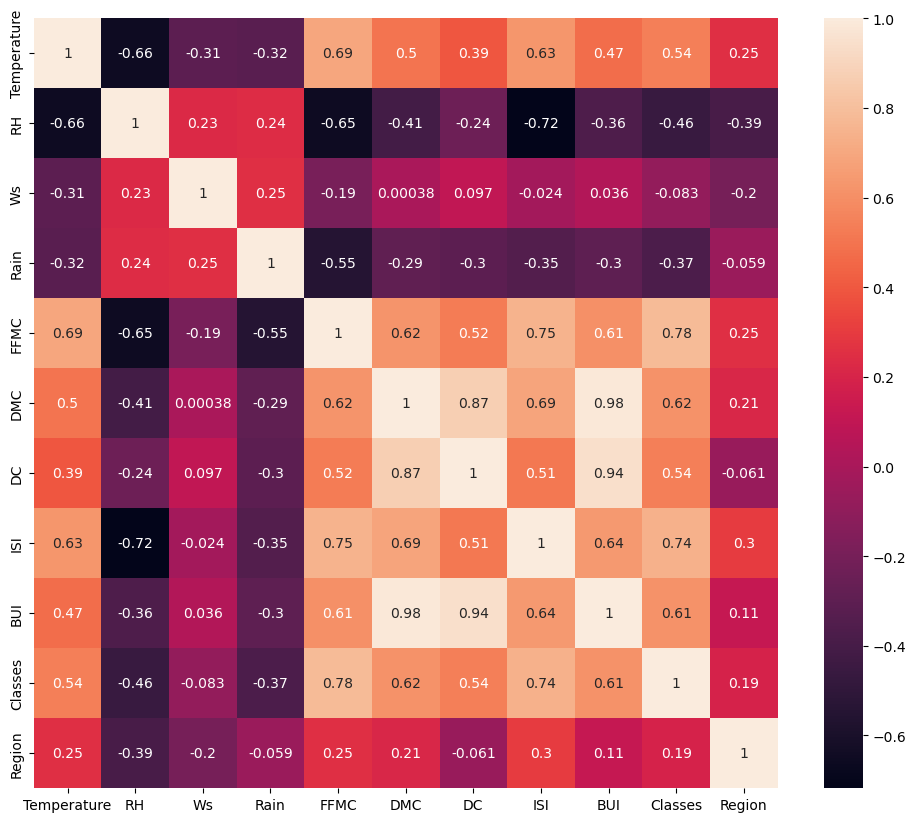

In [248]:
## Check for multicollinearity

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show() 





In [249]:
##define correlation to find multicollinearity
#print(type(X_train))

#type(X_train.corr())

# t=X_train.corr()

# print(type(t.shape))



def correlation(dataset, threshold):

    col_corr = set()

    corr_matrix = dataset.corr()

    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [250]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.80)


corr_features

{'BUI', 'DC'}

In [251]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [252]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [253]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box Plots To understand Effect Of Standard Scaler

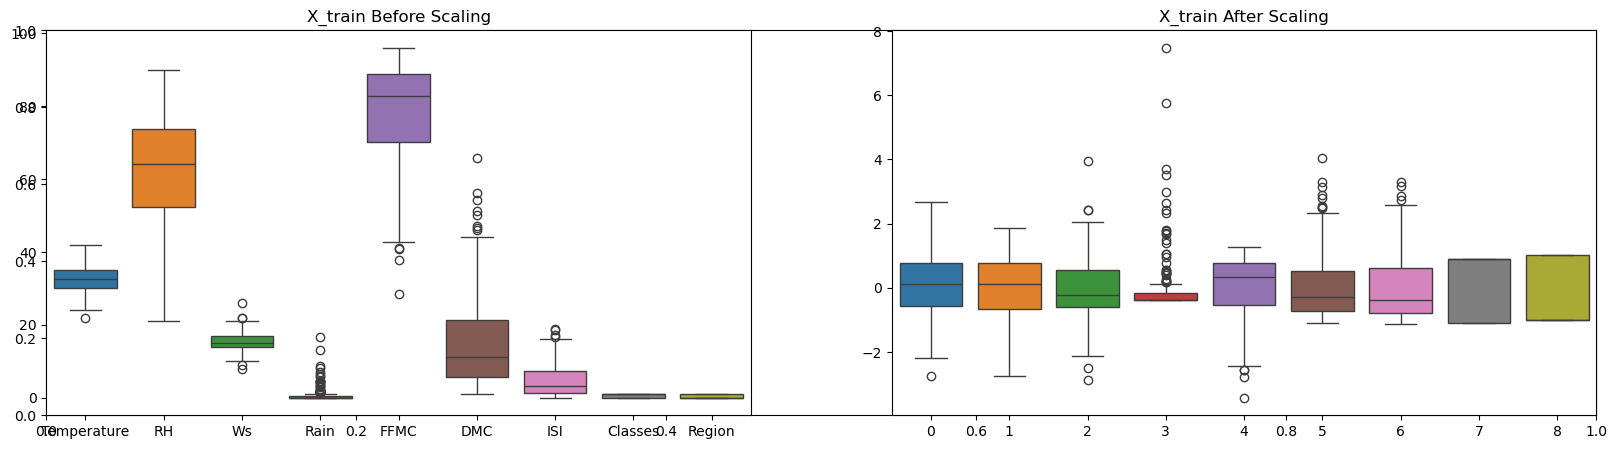

In [254]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

plt.show()

## Linear Regression Model

mean_ab_err: 0.5468236465249976
r2_s: 0.9847657384266951


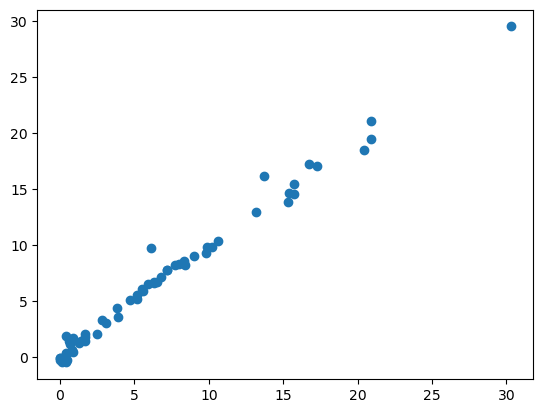

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


cmp_dict= {}

LinReg = LinearRegression(n_jobs = 10)



LinReg.fit(X_train_scaled, y_train)

y_pred = LinReg.predict(X_test_scaled)

mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['LinearRegression'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }


plt.scatter(y_test,y_pred)
plt.show()

# plt.scatter(X_train,y_train, color = 'red')
#plt.scatter(X_test,y_test, color = 'blue')
# plt.plot(X_train, y_pred, color = 'cyan')
# plt.Xlabel("X-input features")
# plt.ylabel("Y-prediction FWI")


## Lasso Regression

mean_ab_err: 1.1331759949144085
r2_s: 0.9492020263112388


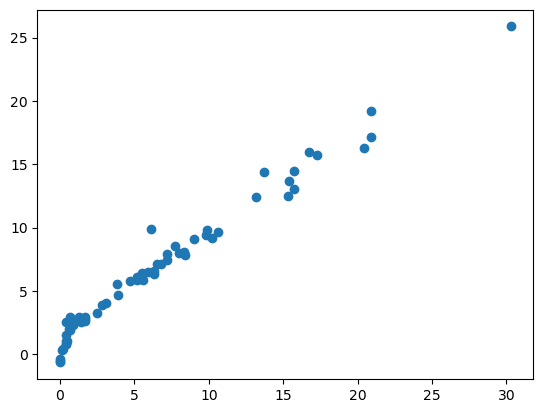

In [256]:
from sklearn.linear_model import Lasso

las_reg= Lasso()

las_reg.fit(X_train_scaled,y_train)

y_pred = las_reg.predict(X_test_scaled)

mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['Lasso'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }

plt.scatter(y_test,y_pred)
plt.show()

### Cross Validation Lasso

In [257]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv = 10, random_state=0)

lassocv.fit(X_train_scaled, y_train)

lassocv.score(X_train_scaled, y_train)




0.9696018606171174

In [258]:
lassocv.alpha_

np.float64(0.028495407505875127)

In [ ]:
lassocv.alphas_

In [ ]:
lassocv.mse_path_

In [270]:
##predict using lasso

y_pred = lassocv.predict(X_test_scaled)

mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['Lassocv'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }

print(cmp_dict)


mean_ab_err: 0.5721047420583084
r2_s: 0.9838526335588409
{'LinearRegression': {'R2_Score': 0.9848, 'MAE': 0.5468}, 'Lasso': {'R2_Score': 0.9492, 'MAE': 1.1332}, 'Lassocv': {'R2_Score': 0.9839, 'MAE': 0.5721}, 'Ridge': {'R2_Score': 0.9843, 'MAE': 0.5642}, 'RidgeCV': {'R2_Score': 0.9843, 'MAE': 0.5642}, 'ElasticNet': {'R2_Score': 0.8753, 'MAE': 1.8822}}


## Ridge Regression model

In [262]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['Ridge'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }

mean_ab_err: 0.5642305340105693
r2_s: 0.9842993364555513


## Ridge CV

In [263]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['RidgeCV'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }

mean_ab_err: 0.5642305340105693
r2_s: 0.9842993364555513


In [264]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

In [265]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['ElasticNet'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }

mean_ab_err: 1.8822353634896
r2_s: 0.8753460589519703


## ElasticNetCV

In [266]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mean_ab_err = mean_absolute_error(y_test, y_pred)

print("mean_ab_err:", mean_ab_err)

r2_s = r2_score(y_test, y_pred)
print("r2_s:", r2_s)

cmp_dict['ElasticNet'] = {
        'R2_Score': round(r2_s, 4),
        'MAE': round(mean_ab_err, 4)
    }

mean_ab_err: 1.8822353634896
r2_s: 0.8753460589519703


In [267]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [272]:
print("--- Final Model Performance Comparison ---")

cmp_dict_df = pd.DataFrame.from_dict(cmp_dict, orient='index').sort_values(by='R2_Score', ascending=True)

print(cmp_dict_df)

--- Final Model Performance Comparison ---
                  R2_Score     MAE
ElasticNet          0.8753  1.8822
Lasso               0.9492  1.1332
Lassocv             0.9839  0.5721
Ridge               0.9843  0.5642
RidgeCV             0.9843  0.5642
LinearRegression    0.9848  0.5468
